Using TensorFlow backend.


(50000, 28, 28) (50000,)


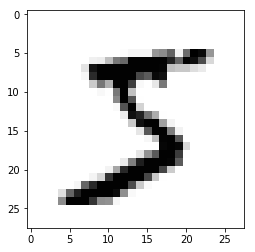

In [1]:
from datetime import datetime
date = datetime.today()
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(0)

sess = tf.Session()

In [3]:
m = X_train.shape[0]
idxs = np.random.permutation(m)
X = X_train.reshape((m, -1))[idxs, :]
y = sess.run(tf.one_hot(y_train, 10))[idxs, :]

X_val = X_val.reshape(X_val.shape[0], -1)

X_test = X_test.reshape((X_test.shape[0], -1))
y_test_input = sess.run(tf.one_hot(y_test, 10))

In [4]:
x = tf.placeholder(tf.float32, shape=(None, X.shape[-1]))
a1 = tf.layers.dense(x, units=50, activation=tf.nn.relu)
a2 = tf.layers.dense(a1, units=50, activation=tf.nn.relu)
a3 = tf.layers.dense(a2, units=50, activation=tf.nn.relu)
y_pred = tf.layers.dense(a3, units=10, activation=tf.nn.softmax)
y_true = tf.placeholder(tf.float32, shape=(None, y.shape[-1]))

loss = tf.losses.softmax_cross_entropy(y_true, y_pred)
optimizer = tf.train.GradientDescentOptimizer(3)
train = optimizer.minimize(loss)


In [5]:
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
train_losses = []
test_losses = []
num_iter = 150
batch_size = 4096
num_batches = np.ceil(m / batch_size)
for i in range(num_iter):
    idxs = np.random.permutation(m)
    X = X[idxs, :]
    y = y[idxs, :]
    for j in range(int(num_batches)):
        sess.run(train, feed_dict={x: X[j*batch_size:(j+1)*batch_size, :],
                                   y_true: y[j*batch_size:(j+1)*batch_size, :]})
        
    if i % 10 == 0:
        train_loss = sess.run(loss, feed_dict={x: X, y_true: y})
        test_loss = sess.run(loss, feed_dict={x: X_test, 
                                          y_true: y_test_input})
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


In [17]:
for i in range(50):
    idxs = np.random.permutation(m)
    X = X[idxs, :]
    y = y[idxs, :]
    for j in range(int(num_batches)):
        sess.run(train, feed_dict={x: X[j*batch_size:(j+1)*batch_size, :],
                                   y_true: y[j*batch_size:(j+1)*batch_size, :]})
        
    if i % 10 == 0:
        train_loss = sess.run(loss, feed_dict={x: X, y_true: y})
        test_loss = sess.run(loss, feed_dict={x: X_test, 
                                          y_true: y_test_input})
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print (i)

0
10
20
30
40


In [20]:
for i in range(50):
    idxs = np.random.permutation(m)
    X = X[idxs, :]
    y = y[idxs, :]
    for j in range(int(num_batches)):
        sess.run(train, feed_dict={x: X[j*batch_size:(j+1)*batch_size, :],
                                   y_true: y[j*batch_size:(j+1)*batch_size, :]})
        
    if i % 10 == 0:
        train_loss = sess.run(loss, feed_dict={x: X, y_true: y})
        test_loss = sess.run(loss, feed_dict={x: X_test, 
                                          y_true: y_test_input})
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print (i)

0
10
20
30
40


In [23]:
for i in range(30):
    idxs = np.random.permutation(m)
    X = X[idxs, :]
    y = y[idxs, :]
    for j in range(int(num_batches)):
        sess.run(train, feed_dict={x: X[j*batch_size:(j+1)*batch_size, :],
                                   y_true: y[j*batch_size:(j+1)*batch_size, :]})
        
    if i % 10 == 0:
        train_loss = sess.run(loss, feed_dict={x: X, y_true: y})
        test_loss = sess.run(loss, feed_dict={x: X_test, 
                                          y_true: y_test_input})
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print (i)

0
10
20


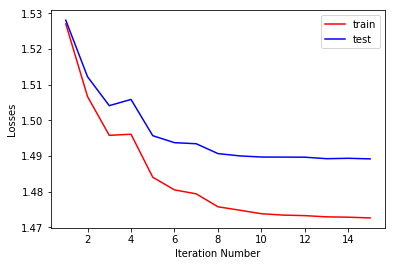

In [9]:
fig = plt.figure()
fig.gca().set_xlabel('Iteration Number')
fig.gca().set_ylabel('Losses')
fig.gca().plot(np.arange(1, len(train_losses)+1), train_losses, 'r', np.arange(1, len(test_losses)+1), test_losses, 'b')
fig.gca().legend(['train', 'test'])

In [24]:
pred = sess.run(y_pred, feed_dict={x: X_test})
pred = np.argmax(pred, axis=1)

In [25]:
accuracy = (y_test == pred).sum() / y_test.shape[0]
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.9732


In [16]:
tdelta = datetime.today() - date
print(tdelta.seconds // 60,  tdelta.seconds % 60)

9 24
